In [93]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import env
import wrangle
import acquire
import split_scale
import prep

In [94]:
df = acquire.prep_iris()

In [95]:
train_df, test_df = split_scale.split_my_data(df,train_ratio=.80,seed=123,stratify=df.species)

In [96]:
X_train = train_df.drop(columns='species')
y_train = pd.DataFrame(train_df.species)
X_test = test_df.drop(columns='species')
y_test = pd.DataFrame(test_df.species)

In [97]:
X_test = test_df.drop(columns='species')
y_test = pd.DataFrame(test_df.species)

In [98]:
logit = LogisticRegression(random_state=123,solver='sag')

In [99]:
logit.fit(X_train,y_train)
logit.score(X_test,y_test)

0.9666666666666667

In [100]:
logit_new = LogisticRegression(random_state=123,solver='sag')
logit_new.fit(X_train,y_train)
logit_new.score(X_test,y_test)

0.9666666666666667

In [101]:
#mul_lr = LogisticRegression(C=1,class_weight={1:2},dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,multi_class='multinominal',n_jobs=None,penalty='12',random_state=123,solver='saga',tol=.0001,verbose=0,warm_start=False)

In [102]:
y_pred = logit.predict(X_train)

In [103]:
print(pd.DataFrame(confusion_matrix(y_train,y_pred)))

    0   1   2
0  40   0   0
1   0  37   3
2   0   0  40


In [104]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.93      0.96        40
           2       0.93      1.00      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [106]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

df = prep.prep_iris_no_encode()


In [107]:


clf = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=111)

In [108]:
train_df, test_df = split_scale.split_my_data(df,train_ratio=.70,seed=123,stratify=df.species)
X_train = train_df.drop(columns='species')
y_train = pd.DataFrame(train_df.species)
X_test = test_df.drop(columns='species')
y_test = pd.DataFrame(test_df.species)

In [109]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=111, splitter='best')

In [110]:
y_pred=clf.predict(X_test)

In [111]:
y_pred[0:5]

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'virginica'],
      dtype=object)

In [29]:
y_pred_prob = clf.predict_proba(X_train)
y_pred_prob

array([[0.     , 1.     , 0.     ],
       [1.     , 0.     , 0.     ],
       [0.     , 1.     , 0.     ],
       [0.     , 0.03125, 0.96875],
       [1.     , 0.     , 0.     ],
       [0.     , 0.03125, 0.96875],
       [1.     , 0.     , 0.     ],
       [0.     , 0.03125, 0.96875],
       [0.     , 0.03125, 0.96875],
       [1.     , 0.     , 0.     ],
       [0.     , 0.03125, 0.96875],
       [0.     , 0.03125, 0.96875],
       [0.     , 0.03125, 0.96875],
       [1.     , 0.     , 0.     ],
       [1.     , 0.     , 0.     ],
       [1.     , 0.     , 0.     ],
       [1.     , 0.     , 0.     ],
       [1.     , 0.     , 0.     ],
       [1.     , 0.     , 0.     ],
       [0.     , 0.03125, 0.96875],
       [0.     , 0.03125, 0.96875],
       [1.     , 0.     , 0.     ],
       [0.     , 0.03125, 0.96875],
       [0.     , 1.     , 0.     ],
       [1.     , 0.     , 0.     ],
       [0.     , 1.     , 0.     ],
       [1.     , 0.     , 0.     ],
       [0.     , 0.     , 1.

In [112]:
clf.score(X_test,y_test)

0.9111111111111111

In [113]:
labels = sorted(y_train.species.unique())
confusion_df = pd.DataFrame(confusion_matrix(y_test,y_pred),index=labels,columns=labels)

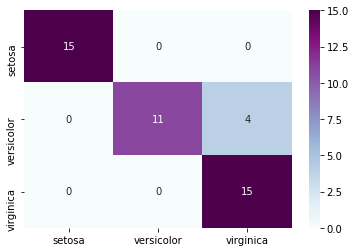

In [117]:
sns.heatmap(confusion_df,annot=True,cmap='BuPu')

In [42]:
#from sklearn.tree import export_graphviz

In [43]:
import graphviz

In [44]:
from graphviz import Graph

In [45]:
dot_data=export_graphviz(clf,out_file=None)
graph = graphviz.Source(dot_data)

graph.render('iris_decision_tree',view=True)

'iris_decision_tree.pdf'

In [133]:
#titanic data decision tree

df_titanic = prep.prep_titanic()
df_titanic.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,age_scaled,fare_scaled
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,0.271174,0.014151
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0.472229,0.139136


In [134]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
int_encoder = LabelEncoder()
int_encoder.fit(df_titanic['class'])
df_titanic['class'] = int_encoder.transform(df_titanic['class'])

In [135]:

df_titanic['is_female'] = df_titanic.sex == 'female'

In [136]:
df_titanic

df_titanic = df_titanic.drop(columns=['age_scaled','fare_scaled','passenger_id','sex'])

In [139]:
#df_titanic.drop(columns='sex',inplace=True)
df_titanic.head(2)

,survived,pclass,age,sibsp,parch,fare,embarked,class,embark_town,alone,is_female
0,0,3,22.0,1,0,7.2500,S,2,Southampton,0,False
1,1,1,38.0,1,0,71.2833,C,0,Cherbourg,0,True


In [138]:
train_df, test_df = split_scale.split_my_data(df_titanic,train_ratio=.70,seed=123,stratify=df_titanic.survived)
X_train = train_df.drop(columns='survived')
y_train = pd.DataFrame(train_df.survived)
X_test = test_df.drop(columns='survived')
y_test = pd.DataFrame(test_df.survived)

In [76]:
df_titanic = df_titanic.drop(columns=['embarked','embark_town',])

In [78]:
int_encoder = LabelEncoder()
int_encoder.fit(df_titanic.class)
df.species = int_encoder.transform(df_titanic.class)

,survived,pclass,age,sibsp,fare,class,alone,is_female
0,0,3,22.0,1,7.2500,Third,0,False
1,1,1,38.0,1,71.2833,First,0,True


In [149]:
df_titanic.dtypes

survived         int64
pclass           int64
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class            int64
embark_town     object
alone            int64
is_female         bool
dtype: object

In [169]:
#df_titanic.age.astype(int)
#clf.fit(X_train,y_train)
avg_adult_age = df_titanic.age[(df_titanic.age.notnull()) & (df_titanic.alone == 0) & (df_titanic.age>18)].mean()
print(avg_adult_age)

avg_child_age = df_titanic.age[(df_titanic.age.notnull()) & (df_titanic.alone != 0) & (df_titanic.age<18)].mean()
avg_child_age

35.190821256038646


15.304347826086957

In [176]:
df_titanic[df_titanic.sibsp >=2].sort_values(by='age',ascending=False)

,survived,pclass,age,sibsp,parch,fare,embarked,class,embark_town,alone,is_female
571,1,1,53.00,2,0,51.4792,S,0,Southampton,0,True
660,1,1,50.00,2,0,133.6500,S,0,Southampton,0,False
245,0,1,44.00,2,0,90.0000,Q,0,Queenstown,0,False
860,0,3,41.00,2,0,14.1083,S,2,Southampton,0,False
104,0,3,37.00,2,0,7.9250,S,2,Southampton,0,False
85,1,3,33.00,3,0,15.8500,S,2,Southampton,0,True
665,0,2,32.00,2,0,73.5000,S,1,Southampton,0,False
726,1,2,30.00,3,0,21.0000,S,1,Southampton,0,True
392,0,3,28.00,2,0,7.9250,S,2,Southampton,0,False
69,0,3,26.00,2,0,8.6625,S,2,Southampton,0,False


In [92]:
labels = sorted(y_train.species.unique())
df_confusion = pd.DataFrame(confusion_matrix(y_test,y_pred),index=labels,columns=labels)

AttributeError: 'DataFrame' object has no attribute 'species'

In [119]:
import math
math.sqrt(5)

2.23606797749979

In [121]:
# Random Forrest Exercises

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
df_titanic.head(2)

,survived,pclass,age,sibsp,fare,class,alone,is_female
0,0,3,22.0,1,7.2500,2,0,False
1,1,1,38.0,1,71.2833,0,0,True
